# Combined inner and outer rings

In [1]:
import numpy as np
from math import sin, log10, cos, atan2, hypot

# Region values
black = -1
white = 1
grey = 0

# Physical dimensions
r_max = 300.
r_min = 50.
r_split = 246. # interface between main sprial and outer rim

npix=512 # pixels spanning -r_max to + r_max

# Spiral parameters
alpha1 = 20.186
m1 = 5
eta1 = -1.308
m2 = -5
alpha2 = 16.149
eta2 = -0.733
m3 = 10
alpha3 = 4.0372
eta3 = -0.575

a = np.zeros(shape=(npix,npix))
for i in range(npix):
    for j in range(npix):
        x = i - npix/2.
        y = j - npix/2.
        phi = atan2(y, x)
        r = r_max*hypot(x,y)*2./npix        
        if (r<=r_max and r>r_min):
            c1 = cos(alpha1*log10(r)+m1*phi+eta1)
            c2 = cos(alpha2*log10(r)+m2*phi+eta2)
            c3 = sin(alpha3*log10(r)+m3*phi+eta3)
            if (r>r_split): # Outer rim
                a[i][j]=white if (c3<0 or c1*c2*c3>0) else black
            else: # Main spiral
                a[i][j]=white if (c1*c2*c3>0) else black
        else: # Colour to distinguish from above values
            a[i][j] = grey


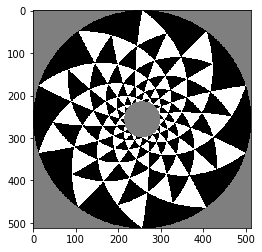

In [2]:
import matplotlib.pyplot as plt
plt.imshow(a,cmap='binary')
plt.show()